In [2]:
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

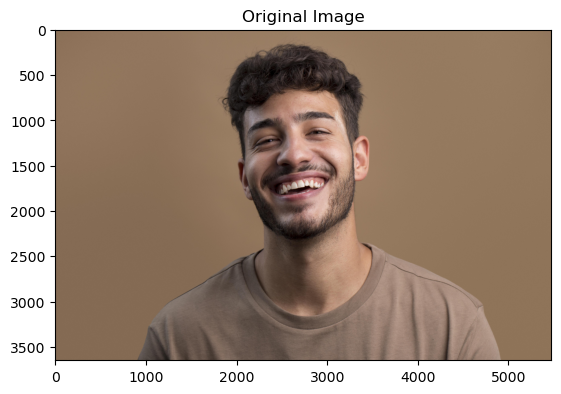

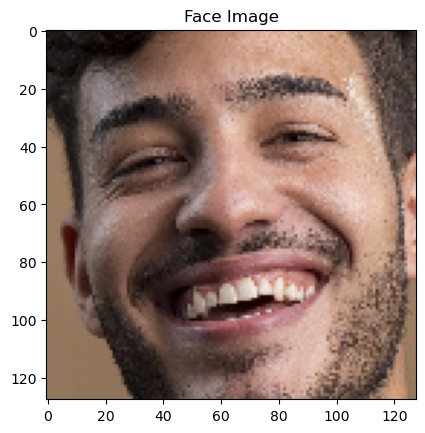

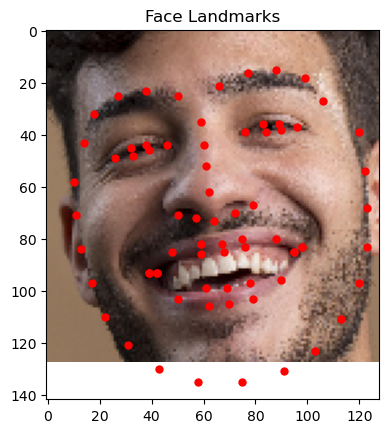

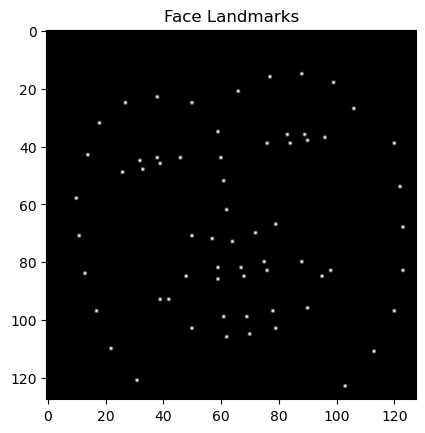

{'chin': [(10, 58), (11, 71), (13, 84), (17, 97), (22, 110), (31, 121), (43, 130), (58, 135), (75, 135), (91, 131), (103, 123), (113, 111), (120, 97), (123, 83), (123, 68), (122, 54), (120, 39)], 'left_eyebrow': [(14, 43), (18, 32), (27, 25), (38, 23), (50, 25)], 'right_eyebrow': [(66, 21), (77, 16), (88, 15), (99, 18), (106, 27)], 'nose_bridge': [(59, 35), (60, 44), (61, 52), (62, 62)], 'nose_tip': [(50, 71), (57, 72), (64, 73), (72, 70), (79, 67)], 'left_eye': [(26, 49), (32, 45), (38, 44), (46, 44), (39, 46), (33, 48)], 'right_eye': [(76, 39), (83, 36), (89, 36), (96, 37), (90, 38), (84, 39)], 'top_lip': [(39, 93), (48, 85), (59, 82), (67, 82), (75, 80), (88, 80), (98, 83), (95, 85), (76, 83), (68, 85), (59, 86), (42, 93)], 'bottom_lip': [(98, 83), (90, 96), (79, 103), (70, 105), (62, 106), (50, 103), (39, 93), (42, 93), (61, 99), (69, 99), (78, 97), (95, 85)]}


In [3]:
image = face_recognition.load_image_file("./images/smile 1.jpg")
plt.imshow(image)
plt.title("Original Image")
plt.show()

face_locations = face_recognition.face_locations(image)
top, right, bottom, left = face_locations[0]
face_image = image[top:bottom, left:right]

IMG_SIZE = (128,128)
# resize image to 250x250
face_image = cv2.resize(face_image,IMG_SIZE)

plt.imshow(face_image)
plt.title("Face Image")
plt.show()


# get landmark from face_image
face_landmarks = face_recognition.face_landmarks(face_image)
face_landmarks = face_landmarks[0]


plt.imshow(face_image)
for k,v in face_landmarks.items():
    # print(k,':',v)
    for i in range(len(v)):
        # plot only if point is not outside of image
        # if v[i][0] < 250 and v[i][1] < 250 and v[i][0] > 0 and v[i][1] > 0:
        #     plt.plot(v[i][0],v[i][1],color='red',marker='o',markersize=5)
        plt.plot(v[i][0],v[i][1],color='red',marker='o',markersize=5)
plt.title("Face Landmarks")
plt.show()



#create a blank binary image with landmarks
blank_image = np.zeros((IMG_SIZE[0],IMG_SIZE[1],1), np.uint8)

# plot landmarks on blank image
for k,v in face_landmarks.items():
    # print(k,':',v)
    for i in range(len(v)):
        # plot only if point is not outside of image
        if v[i][0] < IMG_SIZE[0] and v[i][1] < IMG_SIZE[1] and v[i][0] > 0 and v[i][1] > 0:
            blank_image[v[i][1],v[i][0]] = 1

plt.imshow(blank_image,cmap='gray')
plt.title("Face Landmarks")
plt.show()
print(face_landmarks)

In [4]:
landmarks = []
for k,v in face_landmarks.items():
    for i in range(len(v)):
        landmarks.append(v[i])
landmarks 